In [1]:

  import torch
  import torchvision
  print("PyTorch version:", torch.__version__)
  print("Torchvision version:", torchvision.__version__)
  print("CUDA is available:", torch.cuda.is_available())
  import sys
  !{sys.executable} -m pip install opencv-python matplotlib
  !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
  
  !mkdir images
  !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
  !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
      
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9845ab7p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9845ab7p
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2023-04-18 10:46:26--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw

In [2]:
import pickle
from ultralytics import YOLO

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [4]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [5]:
image_URL = 'https://segmentsai-prod.s3.eu-west-2.amazonaws.com/assets/youssefelhami/2caa1c01-dd6c-4eeb-8106-527d403cc043.jpg'

In [6]:
image = cv2.imread('pizza1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

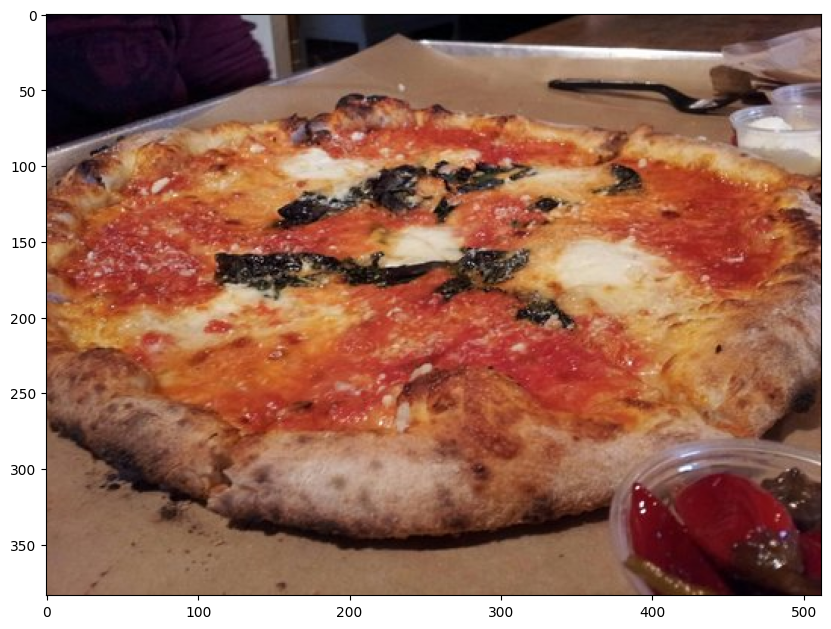

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [8]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pickle
from ultralytics import YOLO

In [43]:
image = cv2.imread('pizza2.jpeg')
model = YOLO('yolov8l.pt')

In [63]:
image = cv2.imread('pizza2.jpeg')

In [64]:
objects = model(image)


0: 640x384 2 pizzas, 41.2ms
Speed: 0.7ms preprocess, 41.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [65]:
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane',
  'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
  'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
  'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
  'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
  'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
  'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
  'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
  'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
  'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
  'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
  'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
  'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [66]:
class_names[53]

'pizza'

In [67]:
from google.colab.patches import cv2_imshow

tensor([53., 53.], device='cuda:0')
pizza
0 133 155 319
pizza
142 141 305 326


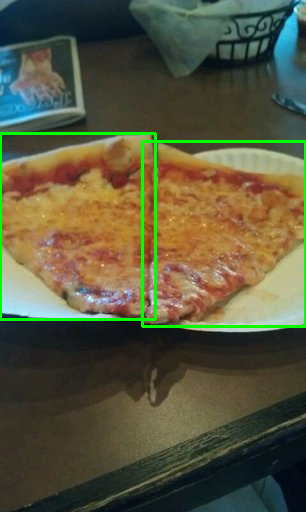

In [76]:
for result in objects:
  boxes = result.boxes
  cls = boxes.cls
  print(boxes.cls)
  # output_index = cls
  # class_name = class_names[output_index]
  # print(class_name)
  # print(boxes[0].xyxy)
  
  for box in boxes:
    
    if int(box.cls) != 53:
      continue
    
    class_name = class_names[int(box.cls)]
    print(class_name)
    
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    print(x1, y1, x2, y2)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
  
cv2_imshow(image)
  # if len(cls) > 0:
  #   x1, y1, x2, y2 = boxes.xyxy

  #   cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
  #   # text = class_name
  #   # font = cv2.FONT_HERSHEY_SIMPLEX
  #   # font_scale = 1.5
  #   # thickness = 4
  #   # text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
  #   # text_x = int(x1 + 5)
  #   # text_y = int(y1 + text_size[1] + 5)
  #   # cv2.putText(image, text, (text_x, text_y), font, font_scale, (0,0,255), thickness)
  #   input_box = np.array(boxes[0].tolist())
  #   plt.figure(figsize=(10,10))
  #   plt.imshow(image)
  #   plt.axis('off')
  #   plt.show()

  

In [77]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4m4sfvh3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4m4sfvh3
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done


In [78]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

In [79]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [80]:
predictor.set_image(image)

In [94]:
image = cv2.imread('pizza2.jpeg')

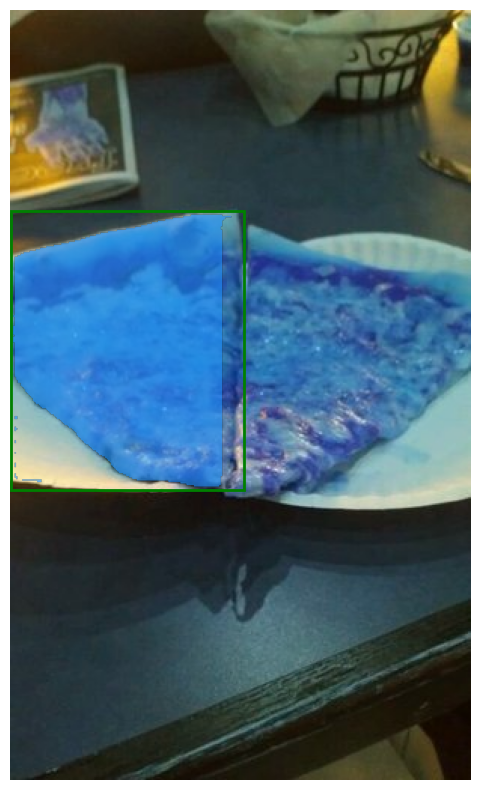

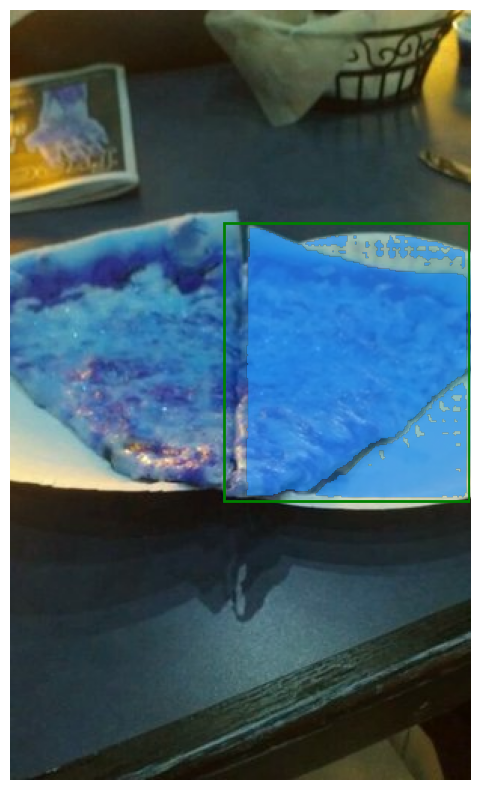

In [96]:
mask_list = []

for result in objects:
  boxes = result.boxes
  cls = boxes.cls
  
  for box in boxes:
    
    if int(box.cls) != 53:
      continue
    
    
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    input_box = np.array([x1, y1, x2, y2])
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )
    mask_list.append(masks)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    show_mask(masks[0], plt.gca())
    show_box(input_box, plt.gca())
    plt.axis('off')
    plt.show()
  


In [88]:
print(len(objects[0]))

2


In [89]:
!pip install supervision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


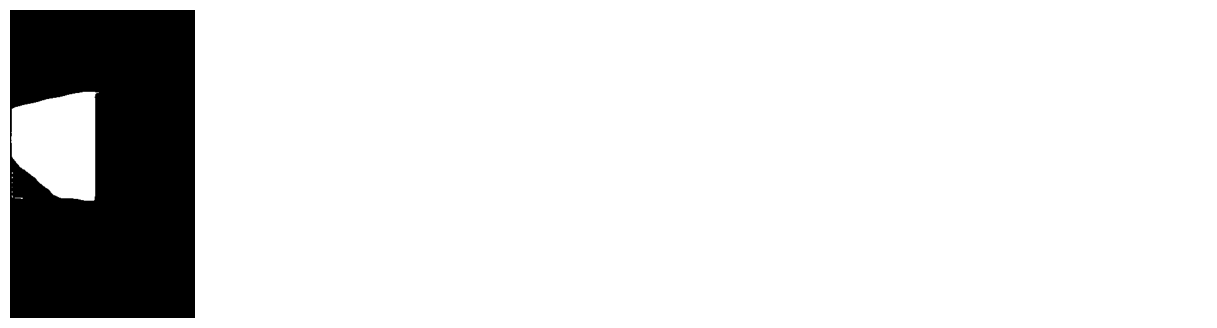

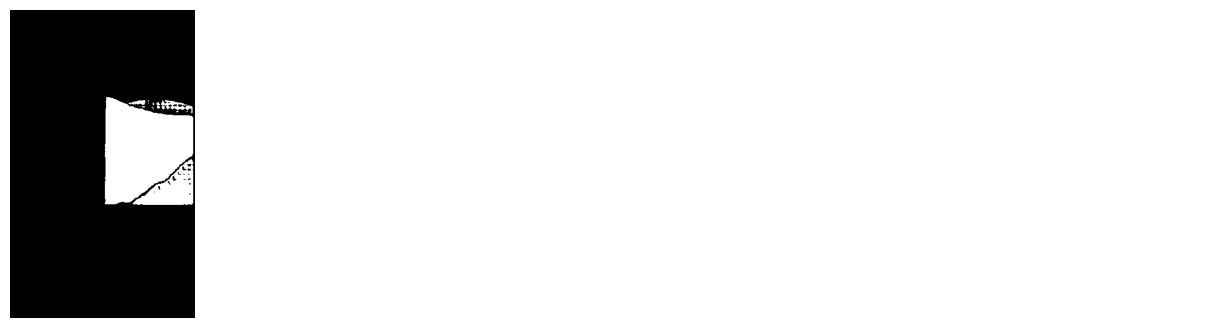

In [97]:
import supervision as sv

for m in mask_list:
  sv.plot_images_grid(
      images=m,
      grid_size=(1, 4),
      size=(16, 4)
  )